# EQUITY VANILLA EUROPEAN-STYLE OPTIONS

Valuation and Risk of a simple Vanilla Equity Option

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.180 - This build:  23 Sep 2020 at 00:02 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#    For bug reports and comments - allmypythonprojects@gmail.com  #
####################################################################



# Define the Call and Put Options

In [3]:
valueDate = FinDate(1, 1, 2015)

In [4]:
expiryDate = valueDate.addYears(0.5)

In [5]:
expiryDate

WED 01 JUL 2015

In [6]:
strikePrice = 50

In [7]:
callOption = FinEquityVanillaOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_CALL)

In [8]:
putOption = FinEquityVanillaOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_PUT)

In [9]:
stockPrice = 50
volatility = 0.20
interestRate = 0.05
dividendYield = 0.0

In [10]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate, FinFrequencyTypes.CONTINUOUS)

In [11]:
model = FinEquityModelBlackScholes(volatility)

In [12]:
callOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)

3.427663335316737

In [13]:
putOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)

2.203180273602875

In [14]:
print(callOption)

EXPIRY DATE: WED 01 JUL 2015
STRIKE PRICE: 50
OPTION TYPE: FinOptionTypes.EUROPEAN_CALL
NUMBER: 1.0


In [15]:
print(putOption)

EXPIRY DATE: WED 01 JUL 2015
STRIKE PRICE: 50
OPTION TYPE: FinOptionTypes.EUROPEAN_PUT
NUMBER: 1.0


## Risk Measures

You can calculate the risk measures using the exact formulae (x risks) or using perturbatory analysis

In [16]:
callOption.delta(valueDate, stockPrice, discountCurve, dividendYield, model)

0.597340092357184

In [17]:
callOption.gamma(valueDate, stockPrice, discountCurve, dividendYield, model)

0.0549574102554861

In [18]:
callOption.theta(valueDate, stockPrice, discountCurve, dividendYield, model)

-4.069837576901426

In [19]:
callOption.rho(valueDate, stockPrice, discountCurve, dividendYield, model)

13.111015814082704

In [20]:
callOption.vega(valueDate, stockPrice, discountCurve, dividendYield, model)

13.626426378415047

## Vectorisation

In [21]:
stockPrices = np.linspace(20,80,100)

In [22]:
value = callOption.value(valueDate, stockPrices, discountCurve, dividendYield, model)

Text(0, 0.5, 'Option Premium')

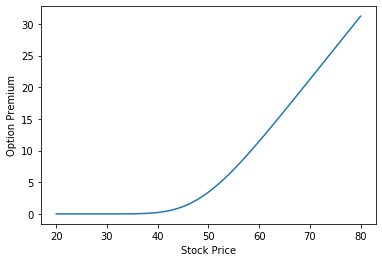

In [23]:
plt.plot(stockPrices, value)
plt.xlabel("Stock Price")
plt.ylabel("Option Premium")

In [24]:
dividendYields = np.linspace(10,150,100)/10000

In [25]:
value = callOption.value(valueDate, stockPrice, discountCurve, dividendYields, model)

Text(0, 0.5, 'Option Premium')

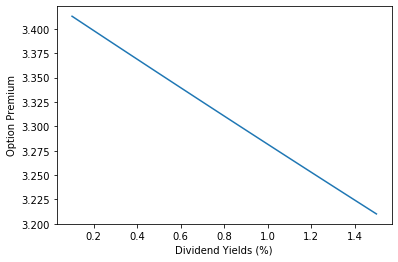

In [26]:
plt.plot(dividendYields*100, value)
plt.xlabel("Dividend Yields (%)")
plt.ylabel("Option Premium")

## Risk Measures using Vectorisations

In [27]:
deltas = callOption.delta(valueDate, stockPrices, discountCurve, dividendYield, model)

Text(0, 0.5, 'Option Deltas')

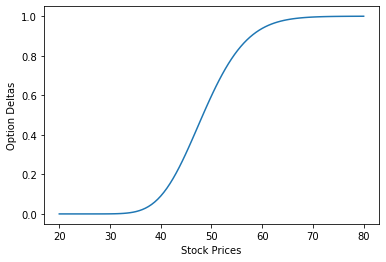

In [28]:
plt.plot(stockPrices, deltas)
plt.xlabel("Stock Prices")
plt.ylabel("Option Deltas")

In [29]:
gammas = callOption.gamma(valueDate, stockPrices, discountCurve, dividendYield, model)

Text(0, 0.5, 'Option Gamma')

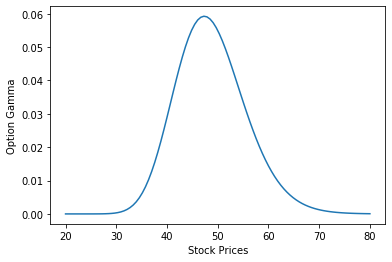

In [30]:
plt.plot(stockPrices, gammas)
plt.xlabel("Stock Prices")
plt.ylabel("Option Gamma")

In [31]:
thetas = callOption.theta(valueDate, stockPrices, discountCurve, dividendYield, model)

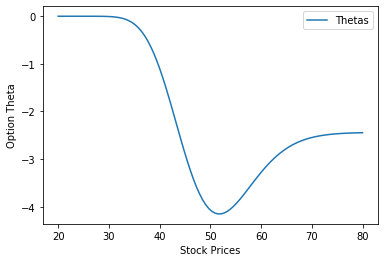

In [32]:
plt.plot(stockPrices, thetas, label="Thetas")
plt.xlabel("Stock Prices")
plt.ylabel("Option Theta")
plt.legend()

In [33]:
rhos = callOption.rho(valueDate, stockPrices, discountCurve, dividendYield, model)

Text(0, 0.5, 'Option Rho')

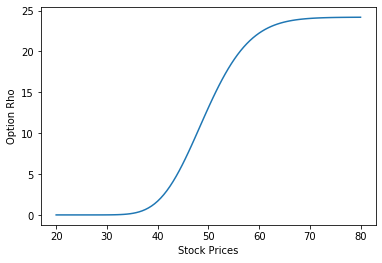

In [34]:
plt.plot(stockPrices, rhos)
plt.xlabel("Stock Prices")
plt.ylabel("Option Rho")

Copyright (c) 2020 Dominic O'Kane